In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_rows", 300)  #表示する行数を増やす

In [3]:
#明智は人名、大湫はツイートなし、日吉は京都にも同じ地名あり、山岡は人名ラーメン屋、釜戸はご飯、明世はツイートなし、土岐は人名、陶は人名器
keyword_list = ['ena', 'nakatsugawa', 'tajimi', 'mizunami', 'iwamura', 'kushihara', 'ueyahagi', 'daishu', 'inetsu', # 分析可能
                'meiyo', 'hiyoshi', 'kamako', 'tou', 'yamaoka', 'toki', 'akechi', #分析困難
                '"obaachanshi"', '"saiensuwa-rudo"', '"kinaata" OR "kinaata"']
keyword = keyword_list[-1]
#period = '2018-06-30'
period = '2018-07-01'
infile = "tweets_in_a_week/"+keyword+period+".csv"
outfile = "tweets_in_a_week/"+keyword+period+".png"

In [4]:
datas = pd.read_csv(open(infile, 'rU'), encoding='utf-8')

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [5]:
datas

,Unnamed: 0,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text
0,0,Mon Jul 02 15:26:32 +0000 2018,one_more_signal,rara_photo,言葉のいらない世界の住人（photo life） instagram : https://t...,61,32,1137,日本 愛知,0,きなあた瑞浪のバイキング閉店しちゃってラーメン屋になってた。ますます行く回数減るわ。#きなあ...


# botとか不適切やツイートを除く

In [6]:
datas = datas.drop('Unnamed: 0', axis=1)

In [7]:
improper_col = []
for col in range(datas.shape[0]):
#    if type(datas.name[col]) != str or type(datas.profile[col]) != str or type(datas.text[col]) != str:
    if type(datas.text[col]) != str:
        print('-'*40)
        print(col)
        print(type(datas.name[col]), type(datas.profile[col]), type(datas.text[col]),)
        print(datas.iloc[col])
        improper_col.append(col)
datas = datas.drop(improper_col, axis=0)
datas = datas.reset_index(drop=True)

In [8]:
improper_names  = ['bot', 'Bot', 'BOT', 'ぼっと', '情報', '案内', '相互', '出会', 'セフレ', 'エッチ', '法人',
                   '宮部雪宗', '多治見ネオ',
#                   'フィギュア', '空き家オールバンク', 'つけめん 恵那く', 'すぎたけ', '東城咲耶子'#for ena
#                   '石田麦', '創作さん', '恵那(癒し力高め中)', 'どう美じゅ合同誌', 'よつばと'] #for ena
                  ] 
improper_profiles  = ['improper_words', 'bot', 'Bot', 'BOT', 'ぼっと',
#                      'えなfam', 'ｶﾞﾁだん', 'ガチだん', 'Καρδιά μου', '月がきれい', '成人済み腐女子', #for ena
#                      'リトルアーモリー', 'アクティブなインドア派声優'] #for ena
                     ]
improper_texts  = ['improper_words', "I'm at", '相互',
#                   '岩村明憲', '岩村努', '岩村愛', #for iwamura
#                   "稲津けんご", #for inatsu
#                   '斉藤恵那', '恵那さん', '恵那ちゃん', 'リトルアーモリー', 'よつばと'] #for ena
                  ] #for ena

for col in range(datas.shape[0]):
    for word in improper_names:
        if word in datas['name'][col]:
            datas['profile'][col] = 'improper_words'
            break
    if type(datas['profile'][col]) == str:
        for word in improper_profiles:
            if word in datas['profile'][col]:
                datas['text'][col] = 'improper_words'
                break
    for word in improper_texts:
        if word in datas['text'][col]:
            datas = datas.drop(col, axis=0)
            break

datas = datas.reset_index(drop=True)

In [9]:
datas

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text
0,Mon Jul 02 15:26:32 +0000 2018,one_more_signal,rara_photo,言葉のいらない世界の住人（photo life） instagram : https://t...,61,32,1137,日本 愛知,0,きなあた瑞浪のバイキング閉店しちゃってラーメン屋になってた。ますます行く回数減るわ。#きなあ...


# キーワードを多くツイートした人

In [10]:
n_keyword_tweets = datas['id'].value_counts()
n_keyword_tweets_arr = []

for col in range(datas.shape[0]):
    n_keyword_tweets_arr.append(n_keyword_tweets[datas['id'][col]])
datas['n_keyword_tweets'] = n_keyword_tweets_arr

del n_keyword_tweets, n_keyword_tweets_arr

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


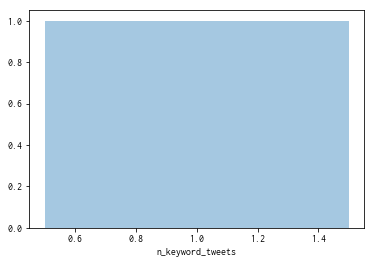

In [11]:
sns.distplot(datas['n_keyword_tweets'])

In [12]:
datas.sort_values('n_keyword_tweets', ascending=False)[:100]

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
0,Mon Jul 02 15:26:32 +0000 2018,one_more_signal,rara_photo,言葉のいらない世界の住人（photo life） instagram : https://t...,61,32,1137,日本 愛知,0,きなあた瑞浪のバイキング閉店しちゃってラーメン屋になってた。ますます行く回数減るわ。#きなあ...,1


# フォロワー数とか

In [13]:
datas_unique = datas.drop_duplicates(subset='id')
datas_unique = datas_unique.reset_index(drop=True)
datas_unique

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
0,Mon Jul 02 15:26:32 +0000 2018,one_more_signal,rara_photo,言葉のいらない世界の住人（photo life） instagram : https://t...,61,32,1137,日本 愛知,0,きなあた瑞浪のバイキング閉店しちゃってラーメン屋になってた。ますます行く回数減るわ。#きなあ...,1


In [14]:
datas_unique.describe()

,n_following,n_followed,n_tweets,n_favorited,n_keyword_tweets
count,1.0,1.0,1.0,1.0,1.0
mean,61.0,32.0,1137.0,0.0,1.0
std,NaN,NaN,NaN,NaN,NaN
min,61.0,32.0,1137.0,0.0,1.0
25%,61.0,32.0,1137.0,0.0,1.0
50%,61.0,32.0,1137.0,0.0,1.0
75%,61.0,32.0,1137.0,0.0,1.0
max,61.0,32.0,1137.0,0.0,1.0


/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


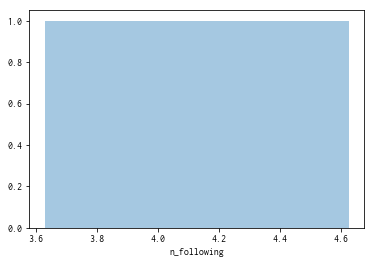

In [15]:
sns.distplot(np.log1p(datas_unique['n_following']))

In [16]:
datas_unique.sort_values(by='n_following', ascending=False)

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
0,Mon Jul 02 15:26:32 +0000 2018,one_more_signal,rara_photo,言葉のいらない世界の住人（photo life） instagram : https://t...,61,32,1137,日本 愛知,0,きなあた瑞浪のバイキング閉店しちゃってラーメン屋になってた。ますます行く回数減るわ。#きなあ...,1


/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


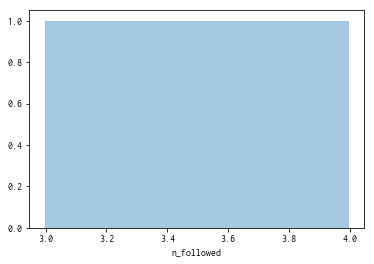

In [17]:
sns.distplot(np.log1p(datas_unique['n_followed']))

In [18]:
datas_unique.sort_values(by='n_followed', ascending=False)

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
0,Mon Jul 02 15:26:32 +0000 2018,one_more_signal,rara_photo,言葉のいらない世界の住人（photo life） instagram : https://t...,61,32,1137,日本 愛知,0,きなあた瑞浪のバイキング閉店しちゃってラーメン屋になってた。ますます行く回数減るわ。#きなあ...,1


/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


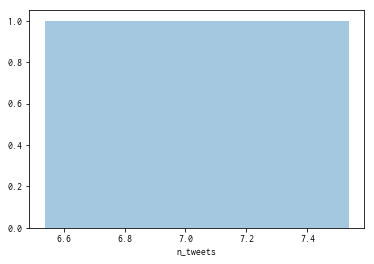

In [19]:
sns.distplot(np.log1p(datas_unique['n_tweets']))

In [20]:
datas_unique.sort_values(by='n_tweets', ascending=False)

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
0,Mon Jul 02 15:26:32 +0000 2018,one_more_signal,rara_photo,言葉のいらない世界の住人（photo life） instagram : https://t...,61,32,1137,日本 愛知,0,きなあた瑞浪のバイキング閉店しちゃってラーメン屋になってた。ますます行く回数減るわ。#きなあ...,1


In [21]:
datas_unique['adress'].value_counts()

日本 愛知    1
Name: adress, dtype: int64

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


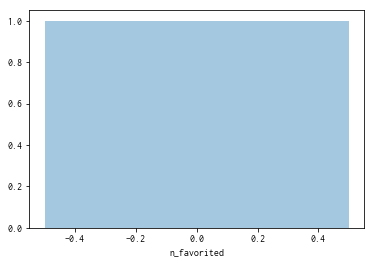

In [22]:
sns.distplot(np.log1p(datas_unique['n_favorited']))

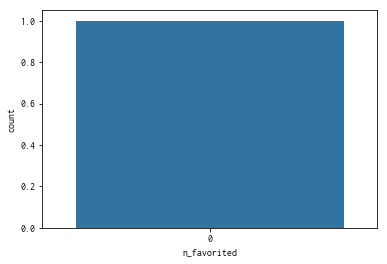

In [23]:
sns.countplot(datas_unique['n_favorited'])

In [24]:
datas_unique.sort_values(by='n_favorited', ascending=False)

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
0,Mon Jul 02 15:26:32 +0000 2018,one_more_signal,rara_photo,言葉のいらない世界の住人（photo life） instagram : https://t...,61,32,1137,日本 愛知,0,きなあた瑞浪のバイキング閉店しちゃってラーメン屋になってた。ますます行く回数減るわ。#きなあ...,1


# キーワードと共にツイートされることが多かった単語

In [25]:
import MeCab
import re

m = MeCab.Tagger("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd/")
word_list = []
for i in range(datas.shape[0]):
    if type(datas.text[i]) == str:
        texts = m.parse(datas['text'][i])
        texts = texts.split('\n')
        for text in texts:
            text = re.split('[\t,]', text)
            if text[0] == 'EOS' or text[0] == '':
                pass
            elif text[1] == '名詞' and text[2] == '一般': 
                word_list.append(text[0])
            elif text[1] == '名詞' and text[2] == 'サ変接続': 
                word_list.append(text[0])
            elif text[1] == '名詞' and text[2] == '形容動詞語幹': 
                word_list.append(text[0])
            elif text[1] == '形容詞' and text[2] == '自立': 
                word_list.append(text[0])

In [26]:
from collections import Counter

counter = Counter(word_list)
for word, cnt in counter.most_common():
    print(word, cnt)

バイキング 1
閉店 1
回数 1


In [27]:
stop_words = ['in', 'ー', 'bot', 'ない', '無い', 'えな']

def remove_specified_values(arr, value):
    while value in arr:
        arr.remove(value)

for word in stop_words:
    remove_specified_values(word_list, word)

In [28]:
counter = Counter(word_list)
for word, cnt in counter.most_common():
    print(word, cnt)

バイキング 1
閉店 1
回数 1


In [29]:
word_list = ' '.join(word_list)

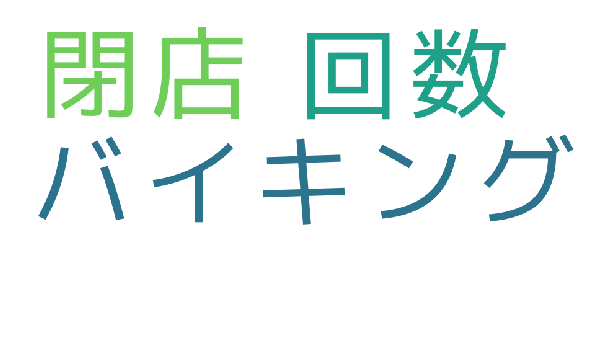

In [30]:
from wordcloud import WordCloud

fpath = "~/Library/Fonts/RictyDiminished-Regular.ttf"

wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500, max_words=80).generate(word_list)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(outfile)
plt.show()
#一文字の単語は表示してくれない...